In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data

# read the excel file without headers
df = pd.read_excel('dataset/Oil formation volume factor(Bo).xlsx', header=2)

In [3]:
bo_subset = df.iloc[:224,:6]
bo_subset

,Bo,T,Rs,Gas gravity,Density,API
0,1.059,142.0,32.300000,1.0010,0.9310,20.500000
1,1.052218,142.0,21.380887,1.0010,0.9310,20.500000
2,1.044571,142.0,7.956277,1.0010,0.9310,20.500000
3,1.0514,133.1,17.900000,1.1590,0.8788,29.515020
4,1.047898,133.1,9.500000,1.1590,0.8788,29.515020
...,...,...,...,...,...,...
219,1.0817,193.9,25.640000,0.9610,0.8415,36.652109
220,1.073174,193.9,19.300000,0.9610,0.8415,36.652109
221,1.058745,193.9,9.800000,0.9610,0.8415,36.652109
222,1.0922,185.0,10.000000,1.0916,0.8688,31.200000


In [4]:
galso_Bo = df.iloc[:224,7:8]
galso_Bo.head()

,Bo.1
0,1.034670
1,1.030883
2,1.026428
3,1.027627
4,1.024617


In [5]:
stand_Bo = df.iloc[:224,10:11]
stand_Bo.head()

,Bo.2
0,1.049742
1,1.045013
2,1.039272
3,1.039756
4,1.035822


In [6]:
vas_beg_Bo = df.iloc[:224,12:13]
vas_beg_Bo.head()

,Bo.3
0,1.043530
1,1.038755
2,1.032884
3,1.040364
4,1.036719


In [7]:
pf_Bo = df.iloc[:224,14:15]
pf_Bo.head()

,Bo.4
0,1.045946
1,1.038572
2,1.027854
3,1.037601
4,1.030012


In [8]:
al2_Bo = df.iloc[:224,19:20]
al2_Bo.head()

,Bo.6
0,1.057513
1,1.052726
2,1.046842
3,1.047701
4,1.043453


In [9]:
fl_Bo = df.iloc[:224,17:18]
fl_Bo.head()

,Bo.5
0,1.051402
1,1.045267
2,1.036189
3,1.042692
4,1.036325


In [10]:
ks_Bo = df.iloc[:224,21:22]
ks_Bo.head()

,Bo.7
0,1.055511
1,1.050097
2,1.042562
3,1.044804
4,1.039541


In [11]:
alme_Bo = df.iloc[:224,23:24]
alme_Bo.head()

,Bo.8
0,1.129479
1,1.126957
2,1.123856
3,1.126368
4,1.124327


In [12]:
al1_Bo = df.iloc[:224,26:27]
al1_Bo.head()

,Bo.9
0,1.043495
1,1.036265
2,1.025937
3,1.028282
4,1.020926


In [13]:
bo_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bo           224 non-null    object 
 1   T            224 non-null    float64
 2   Rs           224 non-null    float64
 3   Gas gravity  224 non-null    float64
 4   Density      224 non-null    float64
 5   API          224 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.6+ KB


In [14]:
bo_subset['Bo'] = bo_subset['Bo'].astype(float)

In [15]:
summary = bo_subset.describe(include='all')
summary

,Bo,T,Rs,Gas gravity,Density,API
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,1.110457,174.268705,87.535680,0.939392,0.869970,31.217729
std,0.168847,26.953500,134.191447,0.268106,0.035870,6.714887
min,0.937001,125.600000,0.341370,0.591500,0.806600,18.871945
25%,1.016019,157.730000,16.631521,0.695750,0.836275,27.280314
50%,1.051809,171.900000,38.764803,0.916073,0.881600,28.549768
75%,1.104101,194.000000,83.466829,1.103250,0.891200,37.702726
max,1.767600,244.000000,770.170000,1.530000,0.941000,43.927721


In [16]:
###Summary Statistics of dataset
summary.loc['kurtosis'] = bo_subset.kurtosis()
summary.loc['skewness'] = bo_subset.skew()
#summary.loc['Co-variance'] = df_rs1.cov().stack()
summary.loc['Coefficent of variance'] = bo_subset.std() / bo_subset.mean() * 100
summary

,Bo,T,Rs,Gas gravity,Density,API
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,1.110457,174.268705,87.535680,0.939392,0.869970,31.217729
std,0.168847,26.953500,134.191447,0.268106,0.035870,6.714887
min,0.937001,125.600000,0.341370,0.591500,0.806600,18.871945
25%,1.016019,157.730000,16.631521,0.695750,0.836275,27.280314
50%,1.051809,171.900000,38.764803,0.916073,0.881600,28.549768
75%,1.104101,194.000000,83.466829,1.103250,0.891200,37.702726
max,1.767600,244.000000,770.170000,1.530000,0.941000,43.927721
kurtosis,5.411638,-0.081866,8.242618,-0.811585,-1.016048,-1.070283
skewness,2.351869,0.422139,2.803960,0.572899,0.084821,0.100554


In [17]:
total_dataset = pd.concat([bo_subset, galso_Bo, stand_Bo, vas_beg_Bo, pf_Bo, fl_Bo, al2_Bo, ks_Bo, alme_Bo, al1_Bo], axis=1)
total_dataset.shape

total_dataset['Bo'] = total_dataset['Bo'].astype(float)

In [18]:
total_dataset.head()

,Bo,T,Rs,Gas gravity,Density,API,Bo.1,Bo.2,Bo.3,Bo.4,Bo.5,Bo.6,Bo.7,Bo.8,Bo.9
0,1.059000,142.0,32.300000,1.001,0.9310,20.50000,1.034670,1.049742,1.043530,1.045946,1.051402,1.057513,1.055511,1.129479,1.043495
1,1.052218,142.0,21.380887,1.001,0.9310,20.50000,1.030883,1.045013,1.038755,1.038572,1.045267,1.052726,1.050097,1.126957,1.036265
2,1.044571,142.0,7.956277,1.001,0.9310,20.50000,1.026428,1.039272,1.032884,1.027854,1.036189,1.046842,1.042562,1.123856,1.025937
3,1.051400,133.1,17.900000,1.159,0.8788,29.51502,1.027627,1.039756,1.040364,1.037601,1.042692,1.047701,1.044804,1.126368,1.028282
4,1.047898,133.1,9.500000,1.159,0.8788,29.51502,1.024617,1.035822,1.036719,1.030012,1.036325,1.043453,1.039541,1.124327,1.020926


In [19]:
total_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bo           224 non-null    float64
 1   T            224 non-null    float64
 2   Rs           224 non-null    float64
 3   Gas gravity  224 non-null    float64
 4   Density      224 non-null    float64
 5   API          224 non-null    float64
 6   Bo.1         224 non-null    float64
 7   Bo.2         224 non-null    float64
 8   Bo.3         224 non-null    float64
 9   Bo.4         224 non-null    float64
 10  Bo.5         224 non-null    float64
 11  Bo.6         224 non-null    float64
 12  Bo.7         224 non-null    float64
 13  Bo.8         224 non-null    float64
 14  Bo.9         224 non-null    float64
dtypes: float64(15)
memory usage: 26.4 KB


In [20]:
total_dataset.corr()

,Bo,T,Rs,Gas gravity,Density,API,Bo.1,Bo.2,Bo.3,Bo.4,Bo.5,Bo.6,Bo.7,Bo.8,Bo.9
Bo,1.000000,0.172968,0.492736,-0.132937,-0.015411,0.017339,0.460182,0.466863,0.473656,0.489843,0.485843,0.468508,0.472722,0.464529,0.480749
T,0.172968,1.000000,0.360021,0.250804,-0.652919,0.662447,0.505122,0.552698,0.469008,0.489864,0.526559,0.567161,0.597170,0.437114,0.635598
Rs,0.492736,0.360021,1.000000,-0.175306,-0.291174,0.297166,0.970311,0.964355,0.960951,0.962885,0.969634,0.960659,0.954043,0.982673,0.940771
Gas gravity,-0.132937,0.250804,-0.175306,1.000000,-0.098313,0.143620,-0.045354,-0.036720,-0.328106,-0.036015,-0.064672,-0.035743,-0.041191,-0.116986,-0.026357
Density,-0.015411,-0.652919,-0.291174,-0.098313,1.000000,-0.987734,-0.381316,-0.412936,-0.367317,-0.385540,-0.411872,-0.427262,-0.451028,-0.340239,-0.478152
API,0.017339,0.662447,0.297166,0.143620,-0.987734,1.000000,0.390766,0.422424,0.361385,0.396075,0.421170,0.436896,0.460695,0.348160,0.487605
Bo.1,0.460182,0.505122,0.970311,-0.045354,-0.381316,0.390766,1.000000,0.997954,0.940943,0.991923,0.993231,0.995646,0.988841,0.989133,0.978856
Bo.2,0.466863,0.552698,0.964355,-0.036720,-0.412936,0.422424,0.997954,1.000000,0.944150,0.990897,0.995453,0.999104,0.995573,0.984085,0.989592
Bo.3,0.473656,0.469008,0.960951,-0.328106,-0.367317,0.361385,0.940943,0.944150,1.000000,0.929535,0.950133,0.944910,0.947012,0.955588,0.939966
Bo.4,0.489843,0.489864,0.962885,-0.036015,-0.385540,0.396075,0.991923,0.990897,0.929535,1.000000,0.996274,0.991808,0.987617,0.984550,0.979138


In [21]:
bo_subset.corr()

,Bo,T,Rs,Gas gravity,Density,API
Bo,1.000000,0.172968,0.492736,-0.132937,-0.015411,0.017339
T,0.172968,1.000000,0.360021,0.250804,-0.652919,0.662447
Rs,0.492736,0.360021,1.000000,-0.175306,-0.291174,0.297166
Gas gravity,-0.132937,0.250804,-0.175306,1.000000,-0.098313,0.143620
Density,-0.015411,-0.652919,-0.291174,-0.098313,1.000000,-0.987734
API,0.017339,0.662447,0.297166,0.143620,-0.987734,1.000000


In [22]:
bo_subset.isna().any()

Bo             False
T              False
Rs             False
Gas gravity    False
Density        False
API            False
dtype: bool

In [23]:
bo_subset.isnull().any()

Bo             False
T              False
Rs             False
Gas gravity    False
Density        False
API            False
dtype: bool

In [24]:
bo_subset[bo_subset.duplicated()]

,Bo,T,Rs,Gas gravity,Density,API


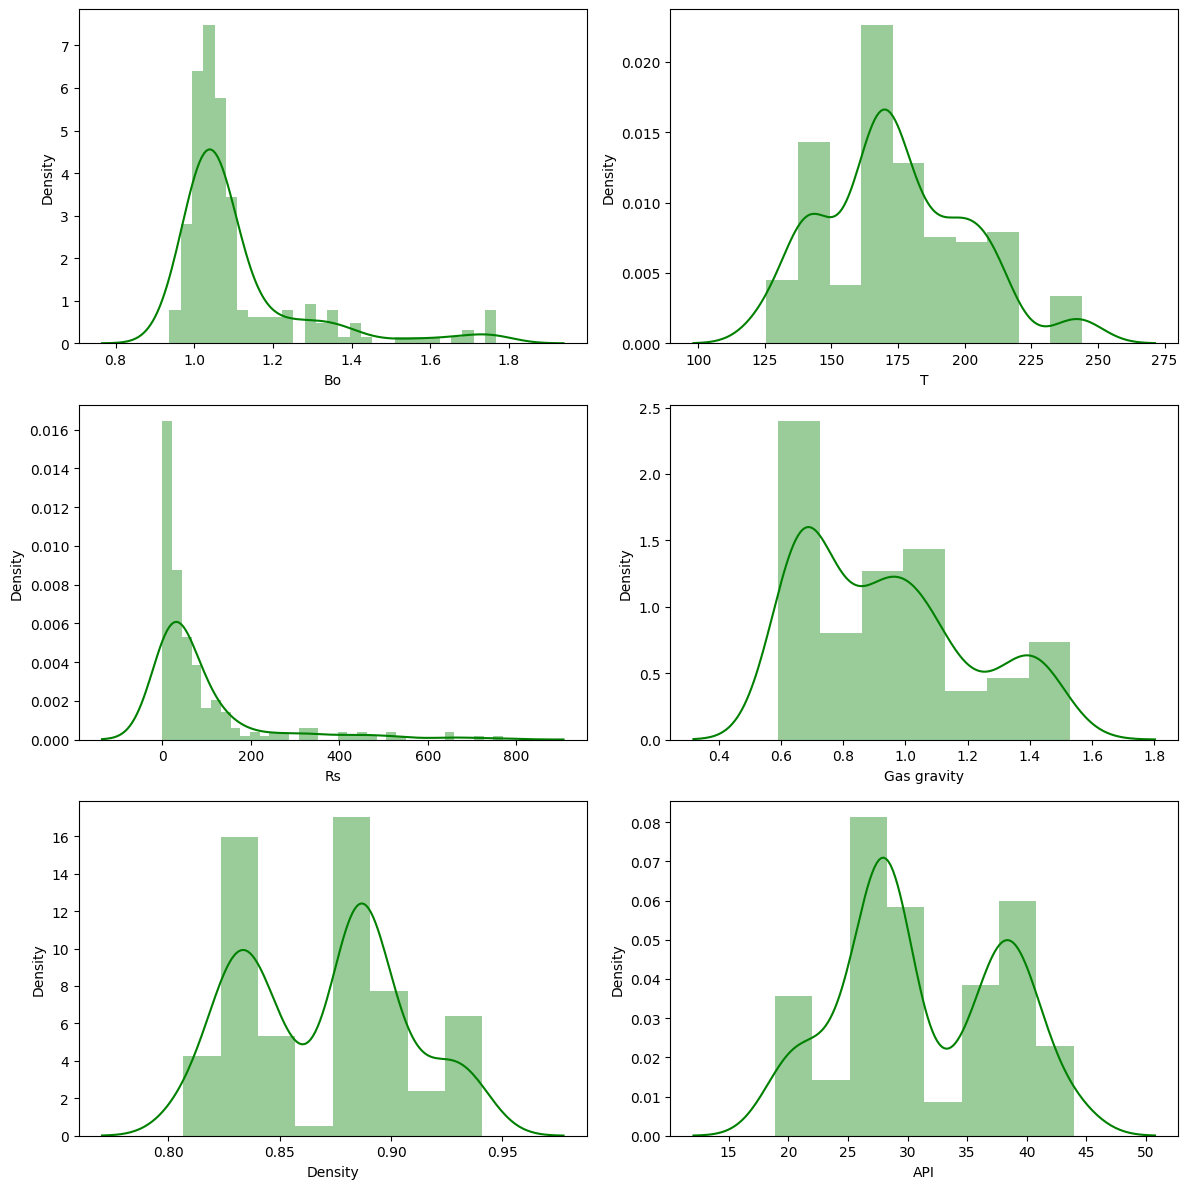

In [25]:
#Plotting distributions of each columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
columns=bo_subset.columns
i=0
j=0
for col in columns[:]:
    sns.distplot(bo_subset[col] , color="green", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

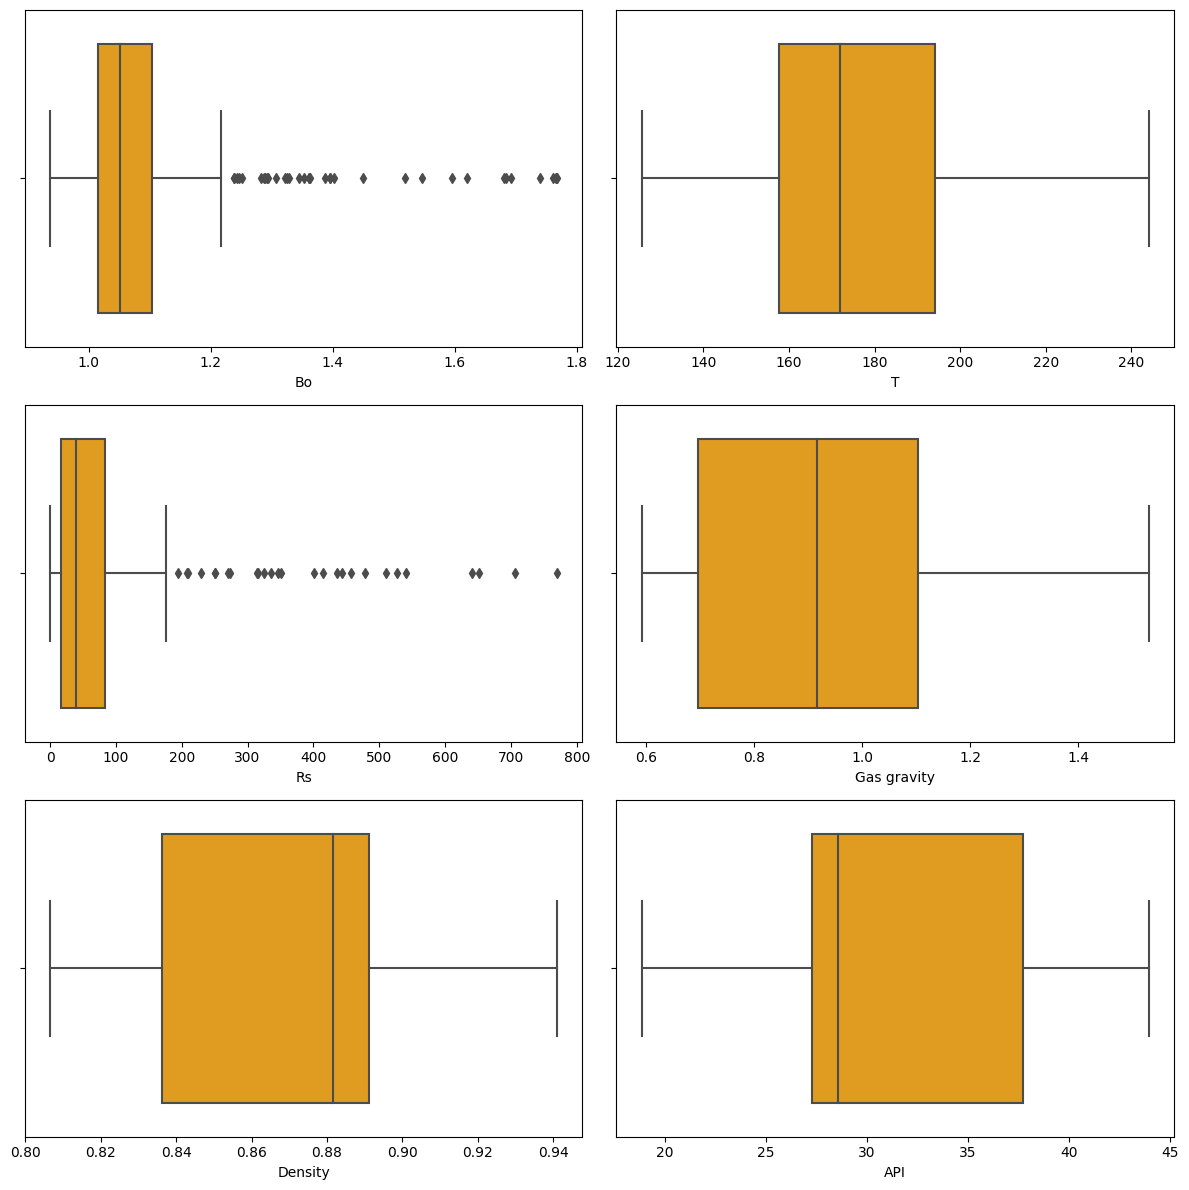

In [26]:
#Plotting distributions of each columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
columns=bo_subset.columns
i=0
j=0
for col in columns[:]:
    sns.boxplot(bo_subset[col] , color="orange", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

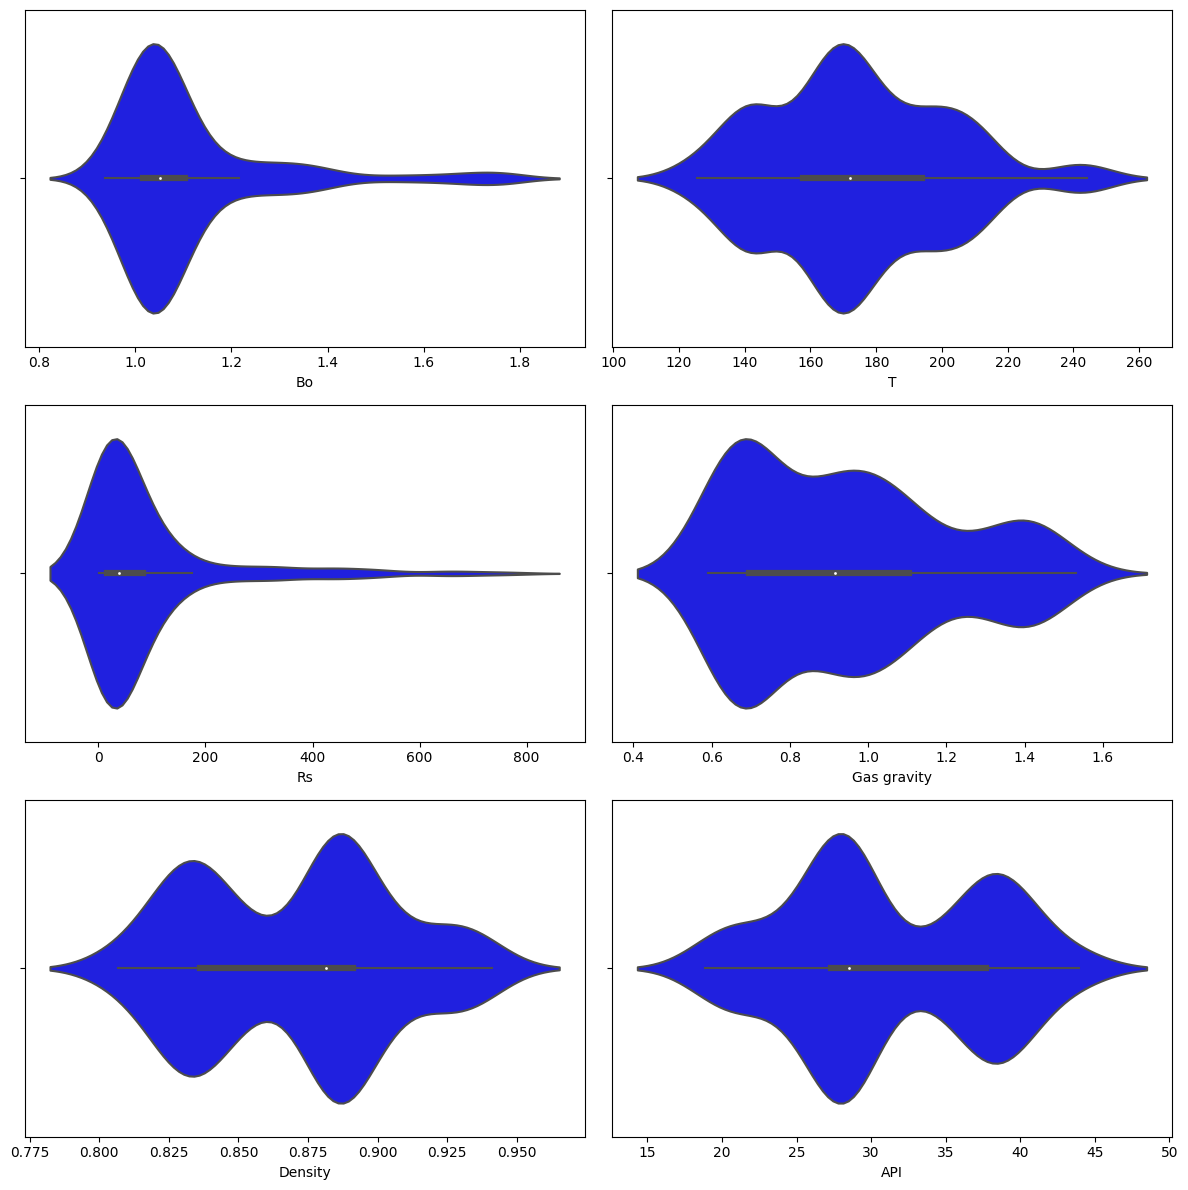

In [27]:
#Plotting distributions of each columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
columns=bo_subset.columns
i=0
j=0
for col in columns[:]:
    sns.violinplot(bo_subset[col] , color="blue", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

<AxesSubplot:>

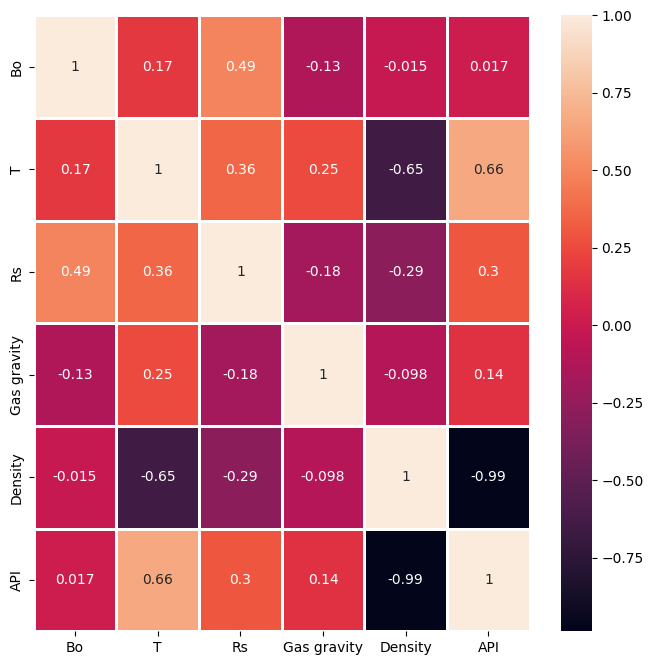

In [28]:
#let’s plot the Pearson correlation coefficient heat map as follows. 
plt.figure(figsize=(8,8))
sns.heatmap(bo_subset.corr(), annot=True,linewidths=2)

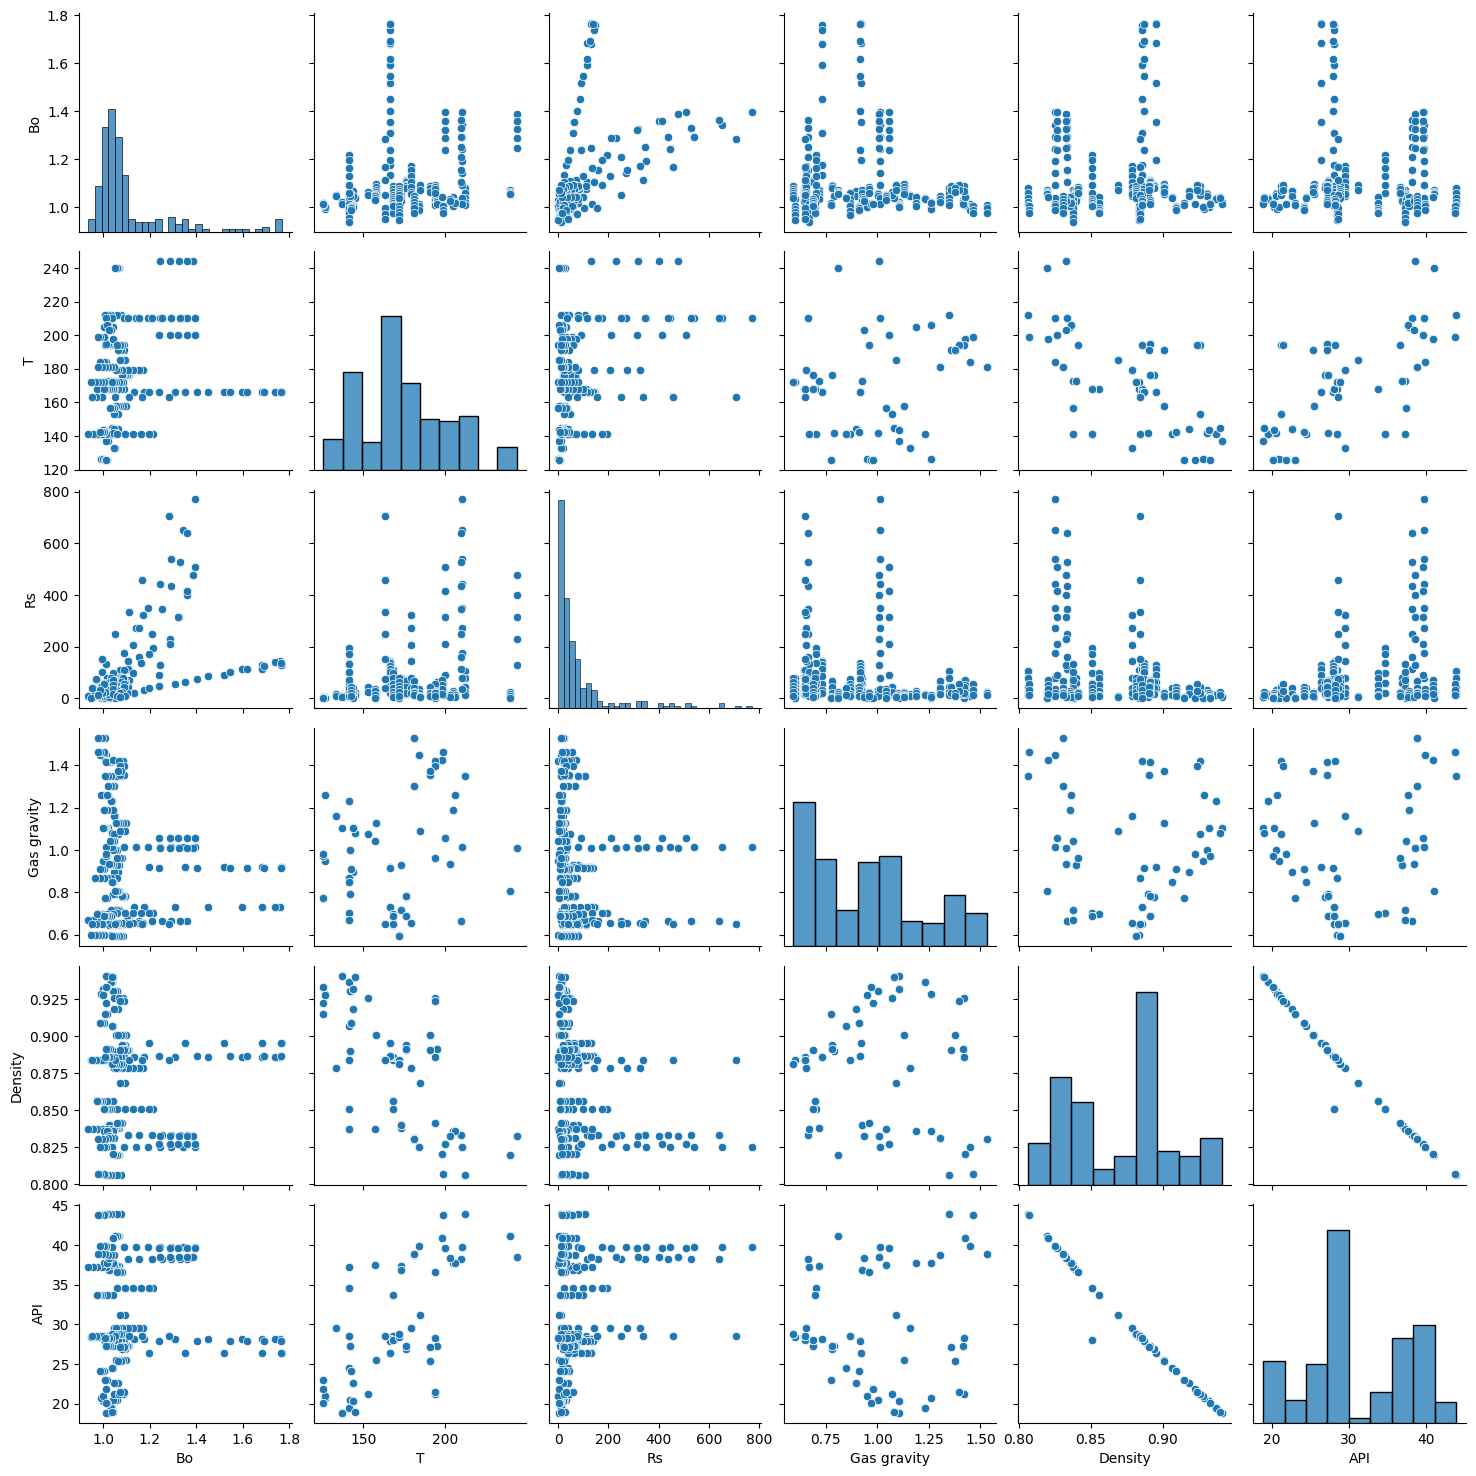

In [29]:
# Create the default pairplot
sns.pairplot(bo_subset)

In [30]:
bo_subset.corrwith(bo_subset['Bo'])

Bo             1.000000
T              0.172968
Rs             0.492736
Gas gravity   -0.132937
Density       -0.015411
API            0.017339
dtype: float64

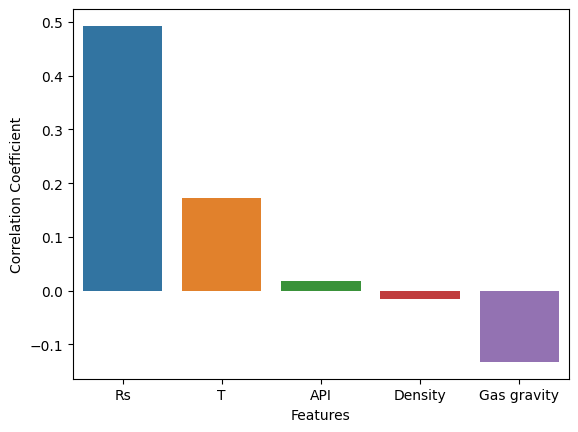

In [31]:
# Calculate the correlation coefficients between the target variable and all other predictor variables
corr = bo_subset.corr()['Bo']
corr = corr[['Rs','T','API','Density','Gas gravity']]

# Plot a bar chart or a heatmap of the correlation coefficients
sns.barplot(x=corr.index, y=corr.values)

# Sort the predictor variables by their correlation coefficients
corr_sorted = corr.sort_values(ascending=False)

# Highlight the target variable in the plot
sns.barplot(x=corr_sorted.index, y=corr_sorted.values)
# Add a y-axis label
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

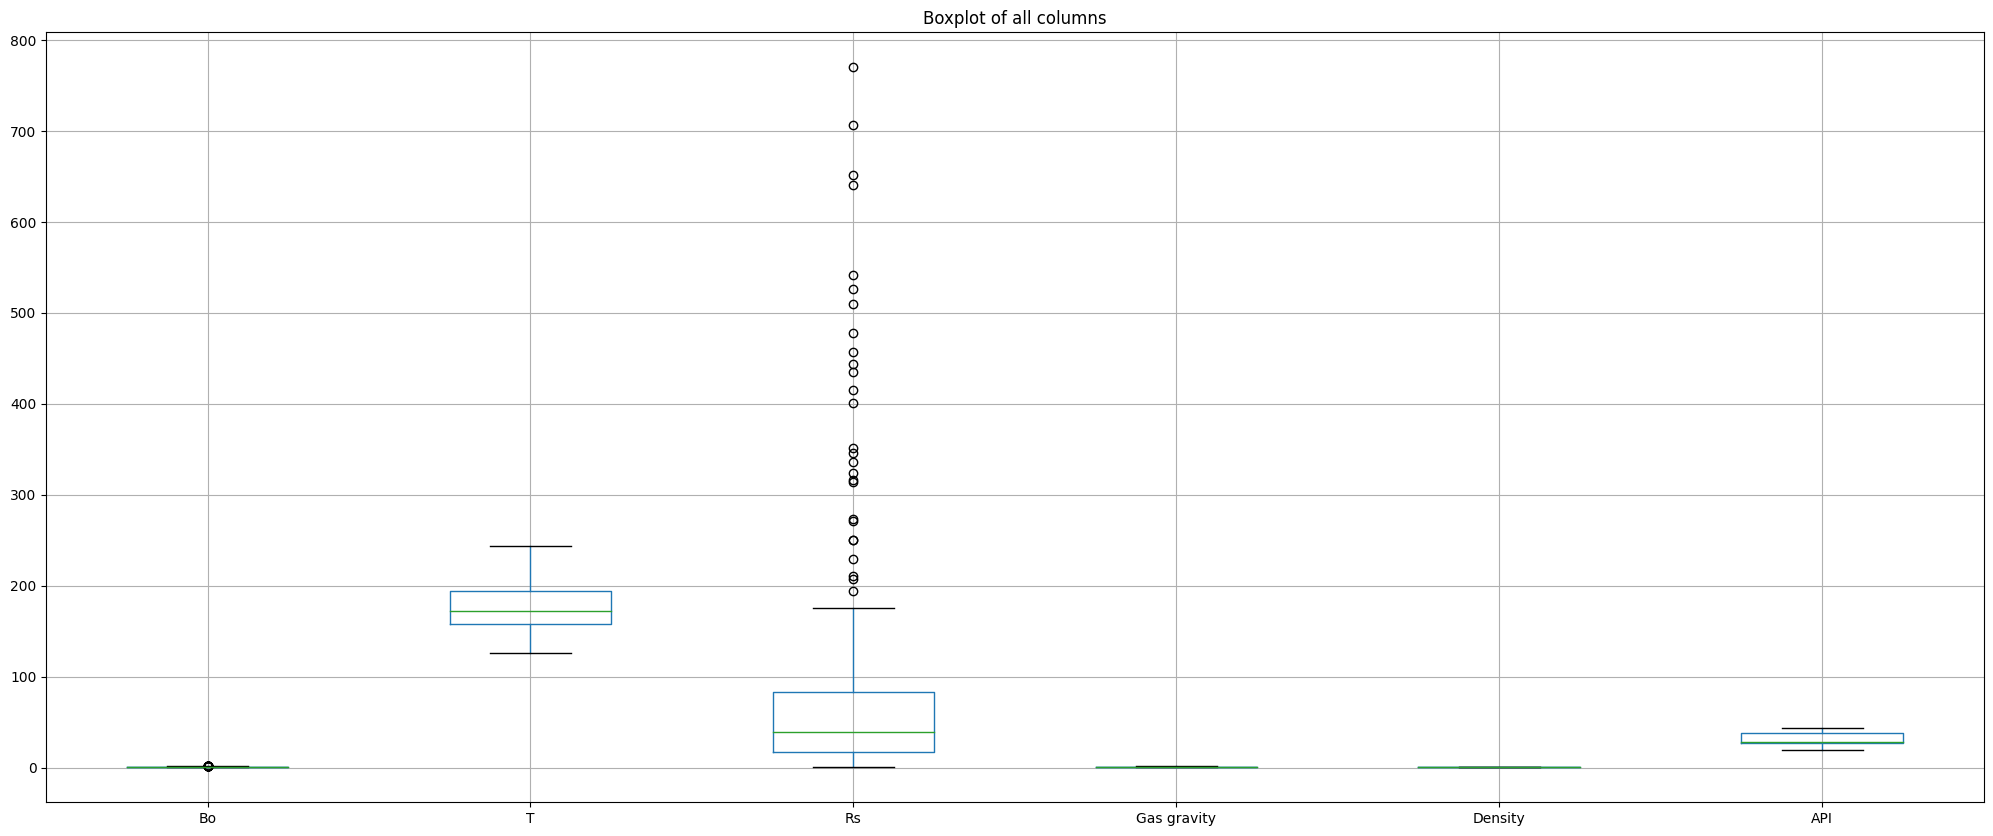

In [32]:
# Plot the boxplot for all columns in the DataFrame
plt.figure(figsize=(25, 10)) # Set the size of the plot
bo_subset.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns') # Add a title to the plot
plt.show() # Show the plot

In [33]:
# calculate lower and upper bounds using IQR
Q1 = bo_subset["Rs"].quantile(0.25)
Q3 = bo_subset["Rs"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# replace outliers with mean
mean = np.mean(bo_subset["Rs"])
bo_subset["Rs"] = np.where(
    (bo_subset["Rs"] < lower_bound) | 
    (bo_subset["Rs"] > upper_bound), 
    mean, 
    bo_subset["Rs"]
)


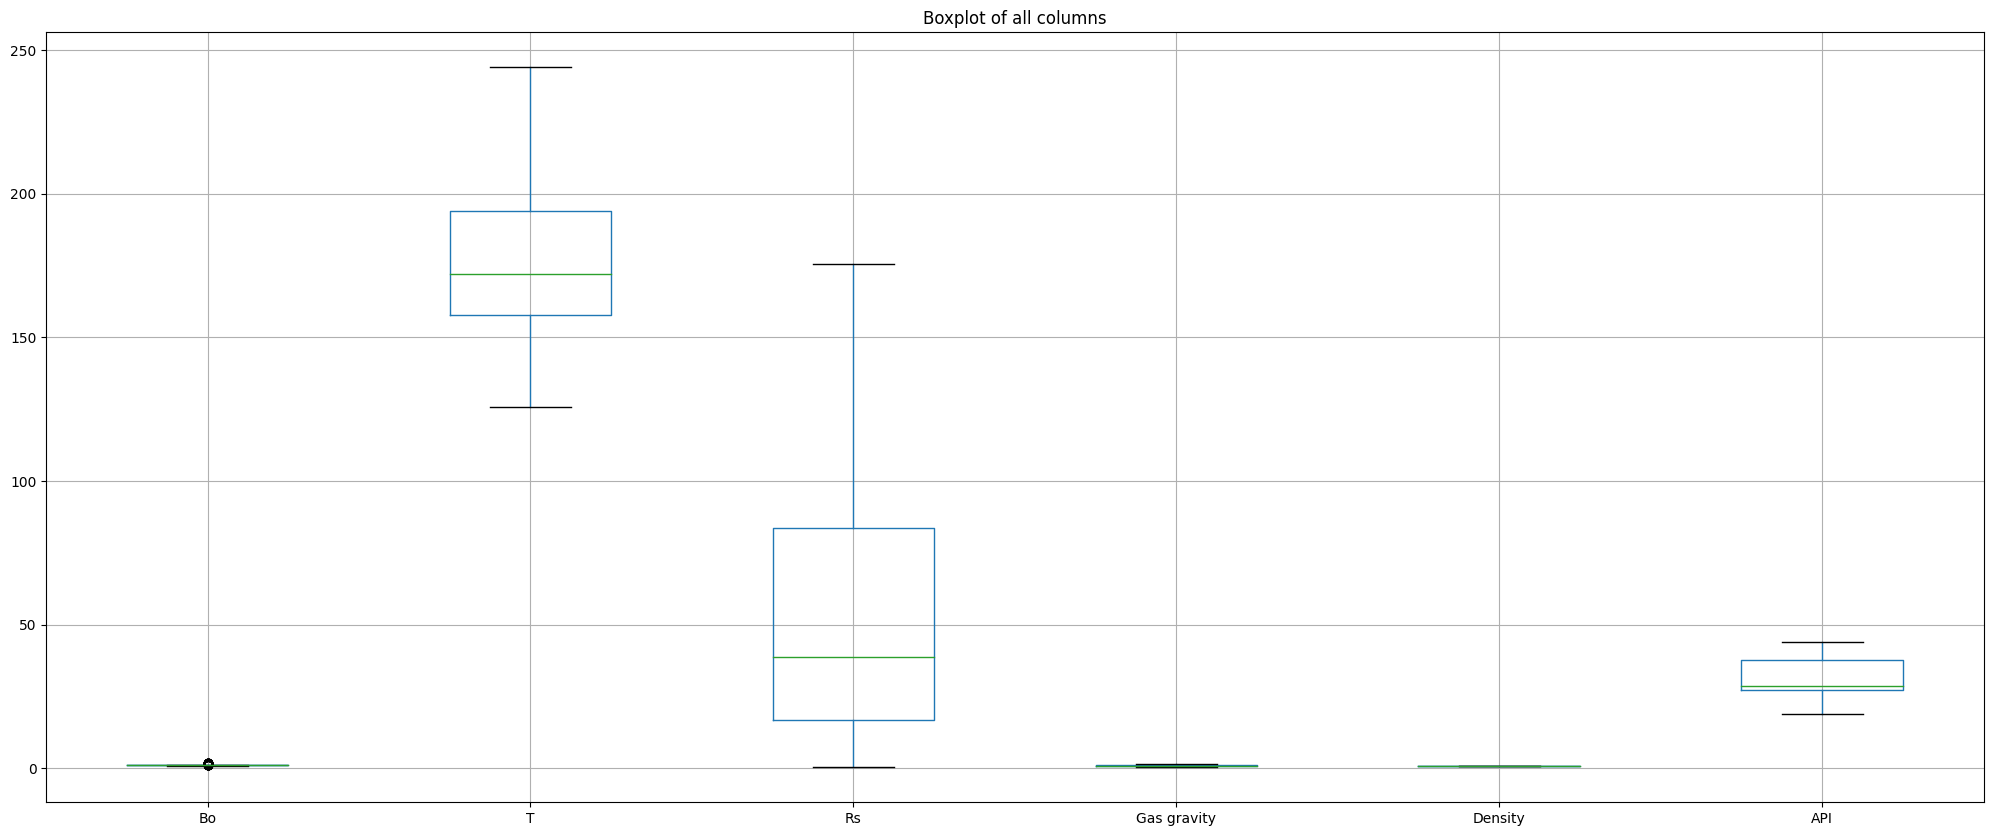

In [34]:
# Plot the boxplot for all columns in the DataFrame
plt.figure(figsize=(25, 10)) # Set the size of the plot
bo_subset.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns') # Add a title to the plot
plt.show() # Show the plot

### Dataset does not have any NULL values and there are no outliers on the data too. So, we can proceed with the existing data as it is.

In [35]:
X = bo_subset.iloc[:,1:6]
X.head()

,T,Rs,Gas gravity,Density,API
0,142.0,32.300000,1.001,0.9310,20.50000
1,142.0,21.380887,1.001,0.9310,20.50000
2,142.0,7.956277,1.001,0.9310,20.50000
3,133.1,17.900000,1.159,0.8788,29.51502
4,133.1,9.500000,1.159,0.8788,29.51502


In [36]:
y = bo_subset.iloc[:,0:1]
y.head()

,Bo
0,1.059000
1,1.052218
2,1.044571
3,1.051400
4,1.047898


In [37]:
y_Bo = pd.concat([y, galso_Bo, stand_Bo, vas_beg_Bo, pf_Bo, fl_Bo, al2_Bo, ks_Bo, alme_Bo, al1_Bo], axis=1)
y_Bo.shape

(224, 10)

In [38]:
y_Bo_train, y_Bo_test = train_test_split(y_Bo, test_size=0.3, random_state=42)

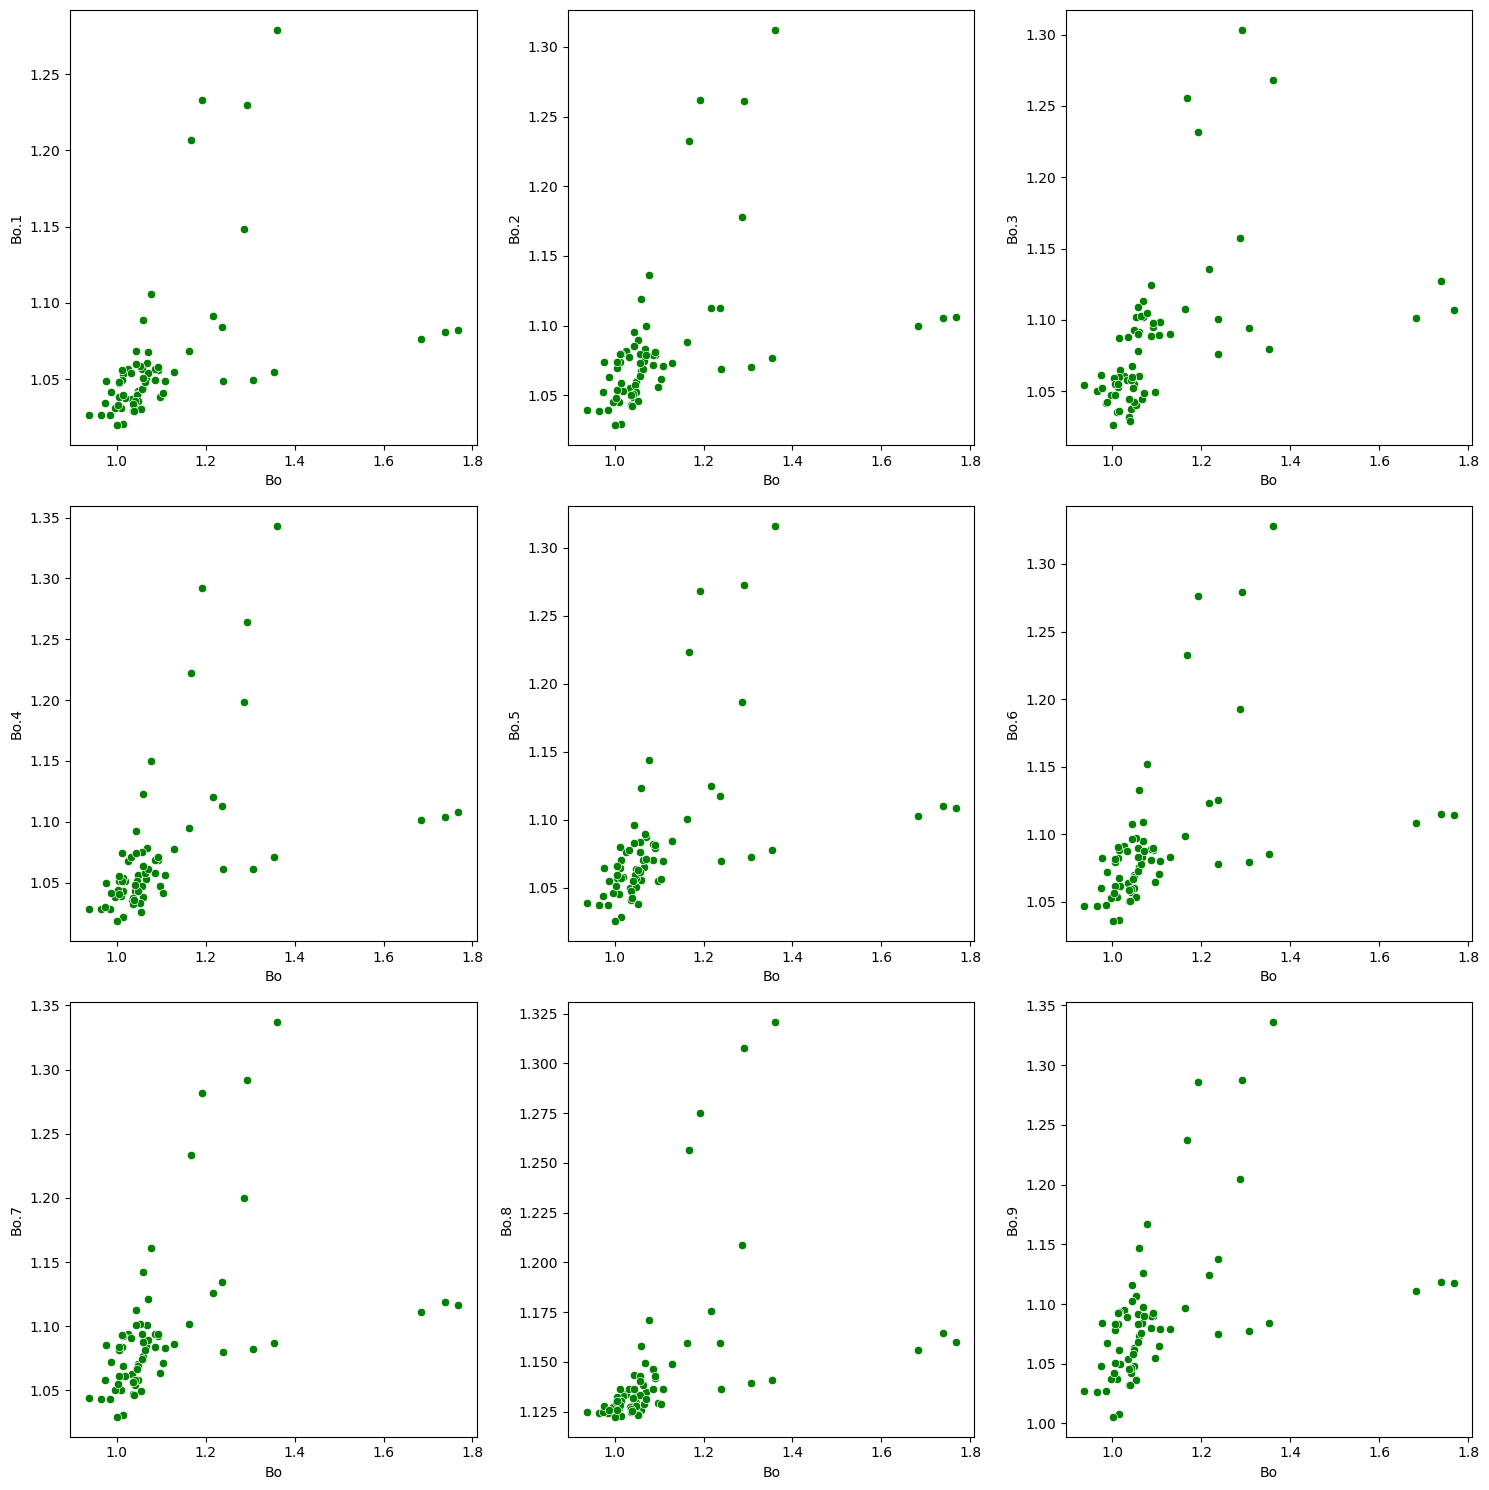

In [39]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
k=0
l=0
for i in (y_Bo_test.iloc[:,1:]):
    sns.scatterplot(y_Bo_test.iloc[:,0], y_Bo_test[i], color='g',ax=axes[k, l])
    if (l==0 or l == 1):
        if(l==0):
            l=1
        else:
            l=2
    else:
        l=0
        k=k+1  
plt.tight_layout()

#### Splitting the data into Train and Test (70:30)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
#Scaling the data 

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [42]:
# Define the parameter grid for each model
# linreg_params = {'normalize': [True, False]}
lasso_params = {'alpha': [0.01, 0.1, 1]}
knn_params = {'n_neighbors': np.arange(1, 11)}
rf_params = {'n_estimators': [10, 50, 100], 'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
ann_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['logistic', 'relu'], 'alpha': [0.0001, 0.001, 0.01]}
svm_params = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
gboost_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [3, 4, 5]}

In [43]:
# Define the models to build in the for loop
models = [(Lasso(), lasso_params),
          (KNeighborsRegressor(), knn_params),
          (RandomForestRegressor(), rf_params),
          (MLPRegressor(), ann_params),
          (SVR(), svm_params),
          (GradientBoostingRegressor(), gboost_params)
         ]

In [44]:
y_test=y_test.to_numpy()

In [45]:
from scipy.stats import pearsonr
# Loop over the models and perform grid search cross-validation
for model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid_search.fit(X_scaled_train, y_train)
    y_pred = grid_search.predict(X_scaled_test)
    mse = mean_squared_error(y_test, y_pred)
    y_test = np.squeeze(y_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r, p_value = pearsonr(y_test,y_pred)
    n = len(y_test)
    aape = (100/n) * sum(abs(y_test[i] - y_pred[i]) / y_test[i] for i in range(n))
    print(str(model))
    print("Best parameters: ", grid_search.best_params_)
    print("Mean squared error: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Lasso()
Best parameters:  {'alpha': 0.01}
Mean squared error: 0.013
R-squared: 0.510
R value:  0.7759448063327306
AAPE: 5.481199083909748
------------------------------------------------------------------------------
KNeighborsRegressor()
Best parameters:  {'n_neighbors': 8}
Mean squared error: 0.005
R-squared: 0.818
R value:  [0.9091091246351847]
AAPE: [3.91296985]
------------------------------------------------------------------------------
RandomForestRegressor()
Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 10}
Mean squared error: 0.003
R-squared: 0.892
R value:  0.9447571053884671
AAPE: 3.0881697361890557
------------------------------------------------------------------------------
MLPRegressor()
Best parameters:  {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50,)}
Mean squared error: 0.016
R-squared: 0.375
R value:  0.7544416559903783
AAPE: 8.826480470750523
--------------------------------------------------------------------------

In [46]:
from sklearn.model_selection import RandomizedSearchCV

for model, params in models:
    random_search = RandomizedSearchCV(model, params, n_iter=50, cv=5, n_jobs=-1, random_state=42)
    random_search.fit(X_scaled_train, y_train)
    y_pred = random_search.predict(X_scaled_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(str(model))
    print("Best parameters: ", random_search.best_params_)
    print("Mean squared error: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("------------------------------------------------------------------------------")

Lasso()
Best parameters:  {'alpha': 0.01}
Mean squared error: 0.013
R-squared: 0.510
------------------------------------------------------------------------------
KNeighborsRegressor()
Best parameters:  {'n_neighbors': 8}
Mean squared error: 0.005
R-squared: 0.818
------------------------------------------------------------------------------
RandomForestRegressor()
Best parameters:  {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 10}
Mean squared error: 0.002
R-squared: 0.911
------------------------------------------------------------------------------
MLPRegressor()
Best parameters:  {'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'logistic'}
Mean squared error: 0.012
R-squared: 0.532
------------------------------------------------------------------------------
SVR()
Best parameters:  {'epsilon': 0.01, 'C': 1}
Mean squared error: 0.005
R-squared: 0.797
------------------------------------------------------------------------------
GradientBoostingRegressor()
B

### Using Glaso value in our X in order to predict the Bo

In [47]:
X_1 = total_dataset.iloc[:,1:7]
X_1

,T,Rs,Gas gravity,Density,API,Bo.1
0,142.0,32.300000,1.0010,0.9310,20.500000,1.034670
1,142.0,21.380887,1.0010,0.9310,20.500000,1.030883
2,142.0,7.956277,1.0010,0.9310,20.500000,1.026428
3,133.1,17.900000,1.1590,0.8788,29.515020,1.027627
4,133.1,9.500000,1.1590,0.8788,29.515020,1.024617
...,...,...,...,...,...,...
219,193.9,25.640000,0.9610,0.8415,36.652109,1.050647
220,193.9,19.300000,0.9610,0.8415,36.652109,1.048072
221,193.9,9.800000,0.9610,0.8415,36.652109,1.044288
222,185.0,10.000000,1.0916,0.8688,31.200000,1.041438


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

In [49]:
#Scaling the data 

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [50]:
# Loop over the models and perform grid search cross-validation
for model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid_search.fit(X_scaled_train, y_train)
    y_pred = grid_search.predict(X_scaled_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    aae = []
    for i,j in zip(y_test.to_numpy(), y_pred):
        err=100*(abs(i-j)/i)
        aae.append(err)
    print(str(model))
    print("Absolute Average Error: ", np.mean(aae))
    print("Best parameters: ", grid_search.best_params_)
    print("Mean squared error: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("------------------------------------------------------------------------------")

Lasso()
Absolute Average Error:  6.320281624766385
Best parameters:  {'alpha': 0.01}
Mean squared error: 0.021
R-squared: 0.215
------------------------------------------------------------------------------
KNeighborsRegressor()
Absolute Average Error:  2.912964220624836
Best parameters:  {'n_neighbors': 3}
Mean squared error: 0.003
R-squared: 0.904
------------------------------------------------------------------------------
RandomForestRegressor()
Absolute Average Error:  3.334520493179635
Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
Mean squared error: 0.003
R-squared: 0.869
------------------------------------------------------------------------------
MLPRegressor()
Absolute Average Error:  8.666585039236102
Best parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}
Mean squared error: 0.021
R-squared: 0.199
------------------------------------------------------------------------------
SVR()
Absolute Average Error:  3.

##### Even after including the glaso reading in our X inorder to predict the Bo the results are not effective. So we are just using our existing data as it is.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
#Scaling the data 

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [53]:
y_test=y_test.to_numpy()

### Emsemble Model 

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
reg1 = DecisionTreeRegressor(random_state=1,min_samples_split= 5, min_samples_leaf = 1, max_features= 'sqrt',max_depth= 10)
reg2 = RandomForestRegressor(n_estimators= 2000, min_samples_split= 5, min_samples_leaf = 1, max_features= 'sqrt',max_depth= 10,
                            bootstrap = True)
reg3 = RandomForestRegressor(bootstrap= True, max_depth= 90, max_features= 3,min_samples_leaf = 3, min_samples_split = 8,
                            n_estimators= 200)
reg4 = DecisionTreeRegressor(max_depth=5)
reg5 = GradientBoostingRegressor(random_state=1)
reg6 = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.05)
reg7 = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.10)
reg8 = RandomForestRegressor(bootstrap= True, max_depth= 90, max_features= 3,min_samples_leaf = 3, min_samples_split = 8,
                            n_estimators= 100)
reg9 = DecisionTreeRegressor(random_state=1,max_depth=13)
reg10 = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.25)
reg11 = RandomForestRegressor(n_estimators= 1000, min_samples_split= 5, min_samples_leaf = 1, max_features= 'sqrt',max_depth= 10,
                            bootstrap = True)

VC = VotingRegressor(estimators=[('DT-4', reg1),
                                 ('RF-RS',reg2),
                                 ('RF-GS',reg3),
                                 ('DT2',reg4),
                                 ('Gradient',reg5),
                                 ('Gradient-2',reg6),
                                 ('Gradient-3',reg7),
                                 ('RF-3',reg8),
                                 ('DT-3',reg9),
                                 ('Gradient-4',reg10),
                                 ('RF-4',reg11)])

In [60]:
print('Ensemble Model before Feature Selection - results', '\n')
pred = []

for reg, name in zip([reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,VC],
                     ['DT-4', 'RF-RS','RF-GS','DT2',
                      'Gradient','Gradient-2','Gradient-3','RF-3','DT-3','Gradient-4','RF-4','Voting Regressor']):
    reg.fit(X_scaled_train, y_train)
    predicted = reg.predict(X_scaled_test)
    pred.append(predicted)
    print(name, 'R2-score on test:', np.round(r2_score(y_test, predicted),4))
    print(name, 'Test error:', np.round(mean_squared_error(y_test, predicted),4), '\n')
    y_test = np.squeeze(y_test)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    r, p_value = pearsonr(y_test,predicted)
    n = len(y_test)
    aape = (100/n) * sum(abs(y_test[i] - predicted[i]) / y_test[i] for i in range(n))
    print("mse: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

Ensemble Model before Feature Selection - results 

DT-4 R2-score on test: 0.8208
DT-4 Test error: 0.0047 

mse: 0.005
R-squared: 0.821
R value:  0.9071742450307112
AAPE: 3.450982247567255
------------------------------------------------------------------------------
RF-RS R2-score on test: 0.9198
RF-RS Test error: 0.0021 

mse: 0.002
R-squared: 0.920
R value:  0.9656096531900387
AAPE: 2.5923388153229294
------------------------------------------------------------------------------
RF-GS R2-score on test: 0.8875
RF-GS Test error: 0.003 

mse: 0.003
R-squared: 0.888
R value:  0.9529123629416815
AAPE: 2.990588513152854
------------------------------------------------------------------------------
DT2 R2-score on test: 0.8458
DT2 Test error: 0.0041 

mse: 0.004
R-squared: 0.846
R value:  0.9197828176184913
AAPE: 3.8707267404326378
------------------------------------------------------------------------------
Gradient R2-score on test: 0.917
Gradient Test error: 0.0022 

mse: 0.002
R-squar

In [71]:
st_dev=np.std(pred)
print("StandardDeviation: {:.3f}".format(st_dev))

variance=np.var(pred)
print("Variance: {:.3f}".format(variance))

ssr=mse*len(pred)
print("SSR: {:.3f}".format(ssr))


StandardDeviation: 0.147
Variance: 0.022
SSR: 0.022


In [ ]:
plt.figure(figsize=(6,6))
plt.plot(y_test,predicted, 'b.')
plt.plot(np.linspace(np.min(y_test), np.max(y_test)), np.linspace(np.min(y_test), np.max(y_test)), 'r--')
plt.xlabel('Testing Measured')
plt.ylabel('Testing Predictions')
# plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Scaling the data 

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

#### Performing Feature Selection 

In [ ]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

## Sequential Forward Floating Selection(sffs)
sffs = SFS(GradientBoostingRegressor(n_estimators=200, learning_rate = 0.25),
         k_features=(4),    
         forward=True,
         floating=True,
         cv=0)

sffs.fit(X_scaled_train, y_train)
sffs.k_feature_names_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[['Rs','Gas gravity', 'Density', 'API']], y, test_size=0.3, random_state=42)

In [ ]:
#Scaling the data 

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataset
scaler.fit(X_train)

# transform the dataset using the fitted scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
print('Ensemble Model after Feature Selection - results', '\n')
pred = [[]]
for reg, name in zip([reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9,reg10,reg11,VC],
                     ['DT-4', 'RF-RS','RF-GS','DT2',
                      'Gradient','Gradient-2','Gradient-3','RF-3','DT-3','Gradient-4','RF-4','Voting Regressor']):
    reg.fit(X_scaled_train, y_train)
    predicted = reg.predict(X_scaled_test)
    pred.append(predicted)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    y_test = np.squeeze(y_test)
    r, p_value = pearsonr(y_test,predicted)
    n = len(y_test)
    aape = (100/n) * sum(abs(y_test[i] - predicted[i]) / y_test[i] for i in range(n))
    print("mse: {:.3f}".format(mse))
    print("R-squared: {:.3f}".format(r2))
    print("R value: ",r)
    print("AAPE:",aape)
    print("------------------------------------------------------------------------------")

#### As you can see from the results above, the results before feature selection are better than the results after feature selection.